<a href="https://colab.research.google.com/github/WinifredIfy/Breakdown/blob/main/MBA6636_Winifred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

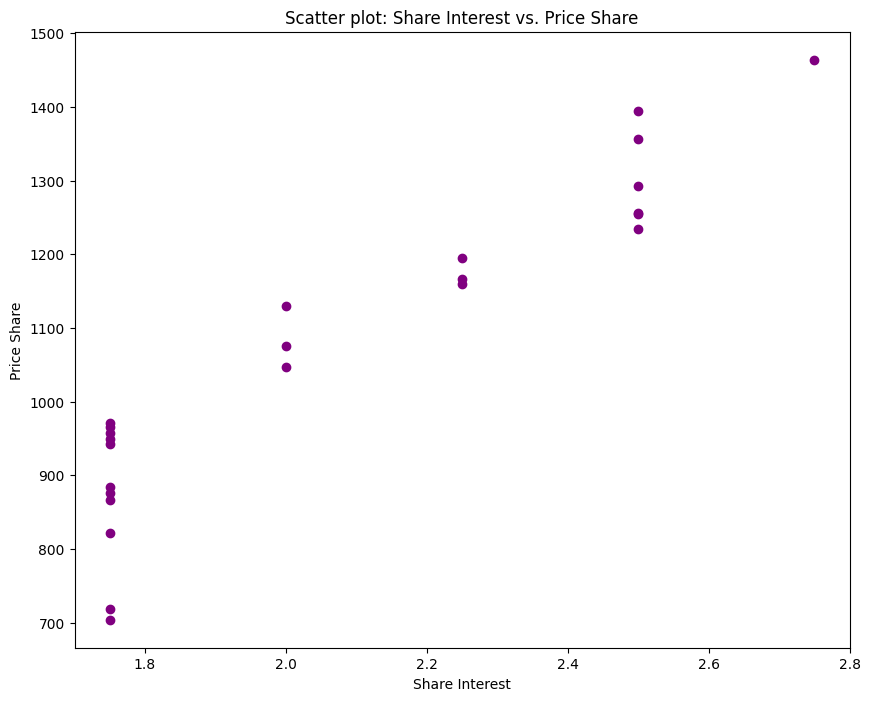

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
Data = {'year': [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
        'month': [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'share_interest': [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
        'unemployment_index': [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6, 5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1],
        'price_share': [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]
        }
df = pd.DataFrame(Data)

# Scatter plot for 'share_interest' vs. 'price_share'
plt.figure(figsize=(10,8))
plt.scatter(df['share_interest'], df['price_share'], color='purple')
plt.title('Scatter plot: Share Interest vs. Price Share')
plt.xlabel('Share Interest')
plt.ylabel('Price Share')
plt.show()





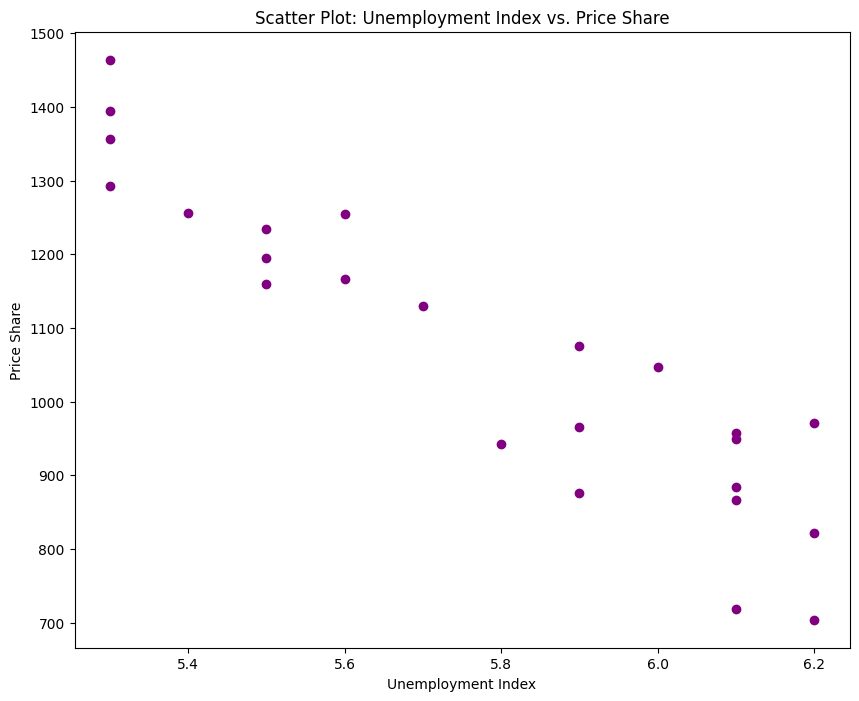

In [22]:
# Scatter plot for 'unemployment_index'vs. 'price_share'
plt.figure(figsize=(10,8))
plt.scatter(df['unemployment_index'], df['price_share'], color='purple')
plt.title('Scatter Plot: Unemployment Index vs. Price Share')
plt.xlabel('Unemployment Index')
plt.ylabel('Price Share')
plt.show()

In [23]:
[] #Show the correlation table for various combinations of variables

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation table
print(correlation_matrix)

                            year         month  share_interest  \
year                1.000000e+00  7.884865e-14        0.882851   
month               7.884865e-14  1.000000e+00        0.339526   
share_interest      8.828507e-01  3.395257e-01        1.000000   
unemployment_index -8.769997e-01 -3.511891e-01       -0.925814   
price_share         8.632321e-01  4.812873e-01        0.935793   

                    unemployment_index  price_share  
year                         -0.877000     0.863232  
month                        -0.351189     0.481287  
share_interest               -0.925814     0.935793  
unemployment_index            1.000000    -0.922338  
price_share                  -0.922338     1.000000  


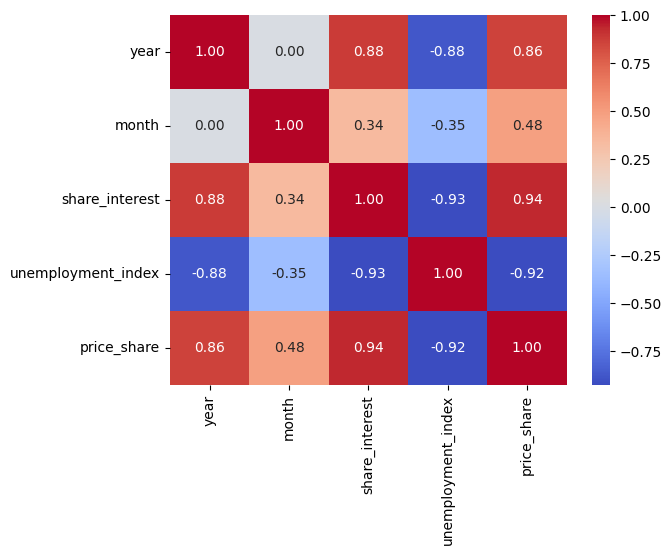

In [24]:
# Create a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [25]:
#Show Intercepts and Coefficient

#Simple Linear Regression using scikit learn

from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape the data for scikit-learn
x_simple_sklearn = df['share_interest'].values.reshape(-1, 1)
y_simple_sklearn = df['price_share'].values

# Create a linear regression model
model_simple_sklearn = LinearRegression()

# Fit the model
model_simple_sklearn.fit(x_simple_sklearn, y_simple_sklearn)

# Print the coefficients
print("Intercept:", model_simple_sklearn.intercept_)
print("coefficient:", model_simple_sklearn.coef_[0])


Intercept: -99.46431881371655
coefficient: 564.2038924930492


In [26]:
#Multiple Linear Regression using scikit-learn

# Assume you want to predict 'price share' based on 'share interest', 'unemployment_index'

x_multiple_sklearn = df[['share_interest','unemployment_index']]
y_multiple_sklearn = df['price_share']

# Create a linear regression model
model_multiple_sklearn = LinearRegression()

# Fit the model
model_multiple_sklearn.fit(x_multiple_sklearn, y_multiple_sklearn)

# Print the coefficients
print("Intercept:", model_multiple_sklearn.intercept_)
print("Coefficients:", model_multiple_sklearn.coef_)

Intercept: 1798.4039776258544
Coefficients: [ 345.54008701 -250.14657137]


In [27]:
#Display the comprehensive regression report table, and explain the test statistics and hypothesis testings [Use Python]

import statsmodels.api as sm

# Add a constant term to the predictor for intercept
X_simple = sm.add_constant(df['share_interest'])
y_simple = df['price_share']

# Fit the model
model_simple = sm.OLS(y_simple, X_simple).fit()

# Display the regression report
print("Simple Linear Regression Report:")
print(model_simple.summary())


Simple Linear Regression Report:
                            OLS Regression Results                            
Dep. Variable:            price_share   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.95e-11
Time:                        01:46:52   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const      

In [28]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have your data loaded in a DataFrame 'df'
X = df[['unemployment_index', 'share_interest']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = df['price_share']

model = sm.OLS(y, X).fit()

# Generate the regression report table
regression_report = model.summary()
print(regression_report)

                            OLS Regression Results                            
Dep. Variable:            price_share   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           4.04e-11
Time:                        01:46:52   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1798.4040    899

In [29]:
#Which model performs better? a. Check the accuracy of the models. Justify and relate your conclusion to different metrics; R_Square, MSE, and Mallow's CP. b. Visualize plots: Residual plots, distribution plots, and regression plots for every combination of variables
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [30]:
# Simple Linear Regression

x_simple = sm.add_constant(df['share_interest'])
y_simple = df['price_share']
model_simple = sm.OLS(y_simple, x_simple).fit()

In [31]:
# Multiple Linear Regression
X_multiple = sm.add_constant(df[['share_interest', 'unemployment_index', 'year']])
y_multiple = df['price_share']
model_multiple = sm.OLS(y_multiple, X_multiple).fit()

In [32]:
# Model Evaluation Metrics
r_squared_simple = model_simple.rsquared
mse_simple = mean_squared_error(y_simple, model_simple.predict(X_simple))
cp_simple = len(y_simple) * (mse_simple / mse_simple - 1) + 2 * (model_simple.params.shape[0] + 1)

r_squared_multiple = model_multiple.rsquared
mse_multiple = mean_squared_error(y_multiple, model_multiple.predict(X_multiple))
cp_multiple = len(y_multiple) * (mse_multiple / mse_multiple - 1) + 2 * (model_multiple.params.shape[0] + 1)


In [33]:
print("R-squared - Simple Linear Regression:", r_squared_simple)
print("MSE - Simple Linear Regression:", mse_simple)
print("Mallow's Cp - Simple Linear Regression:", cp_simple)

print("\nR-squared - Multiple Linear Regression:", r_squared_multiple)
print("MSE - Multiple Linear Regression:", mse_multiple)
print("Mallow's Cp - Multiple Linear Regression:", cp_multiple)

R-squared - Simple Linear Regression: 0.8757089547891358
MSE - Simple Linear Regression: 5289.701729996911
Mallow's Cp - Simple Linear Regression: 6.0

R-squared - Multiple Linear Regression: 0.8985929766904058
MSE - Multiple Linear Regression: 4315.780800817581
Mallow's Cp - Multiple Linear Regression: 10.0


In [34]:
# Visualization
# Residual Plots

residuals_simple = model_simple.resid
residuals_multiple = model_multiple.resid

plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(0, 0.5, 'Residuals')

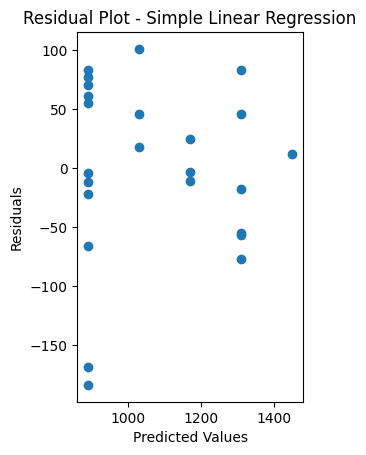

In [35]:
plt.subplot(1, 2, 1)
plt.scatter(model_simple.predict(X_simple), residuals_simple)
plt.title('Residual Plot - Simple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

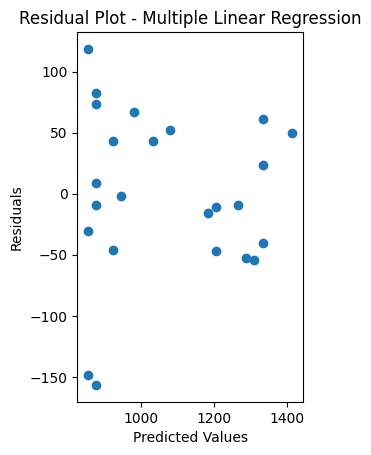

In [36]:
plt.subplot(1, 2, 2)
plt.scatter(model_multiple.predict(X_multiple), residuals_multiple)
plt.title('Residual Plot - Multiple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [37]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

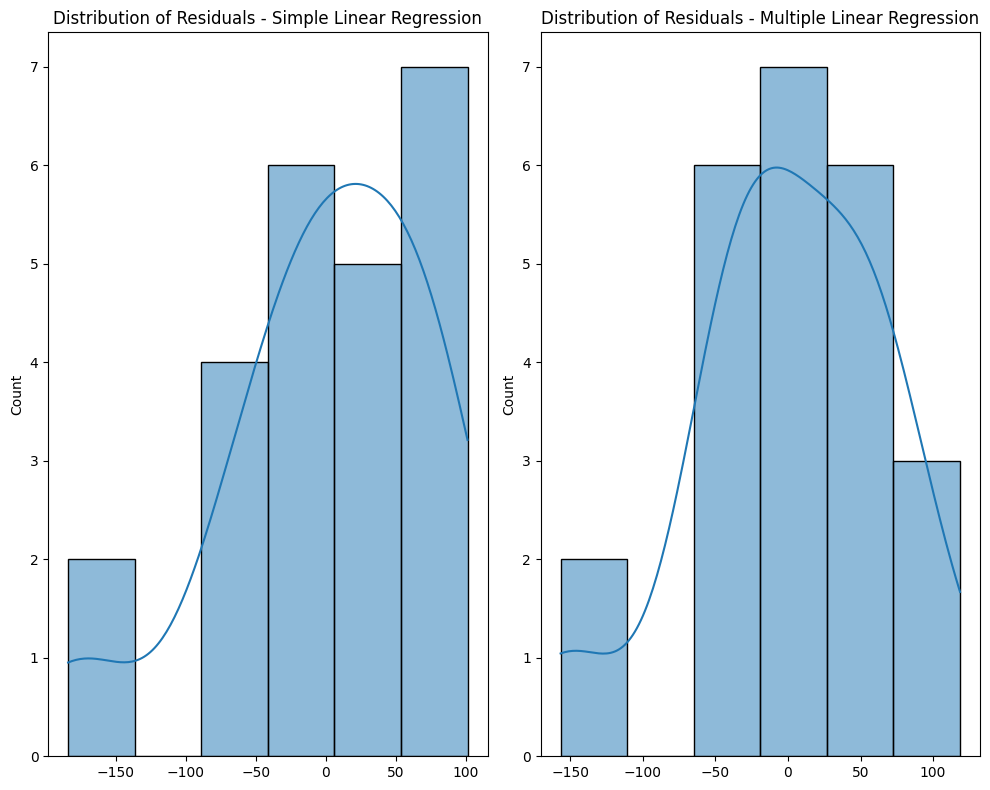

In [38]:
# Distribution Plots
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.histplot(residuals_simple, kde=True)
plt.title('Distribution of Residuals - Simple Linear Regression')

plt.subplot(1, 2, 2)
sns.histplot(residuals_multiple, kde=True)
plt.title('Distribution of Residuals - Multiple Linear Regression')

plt.tight_layout()
plt.show()

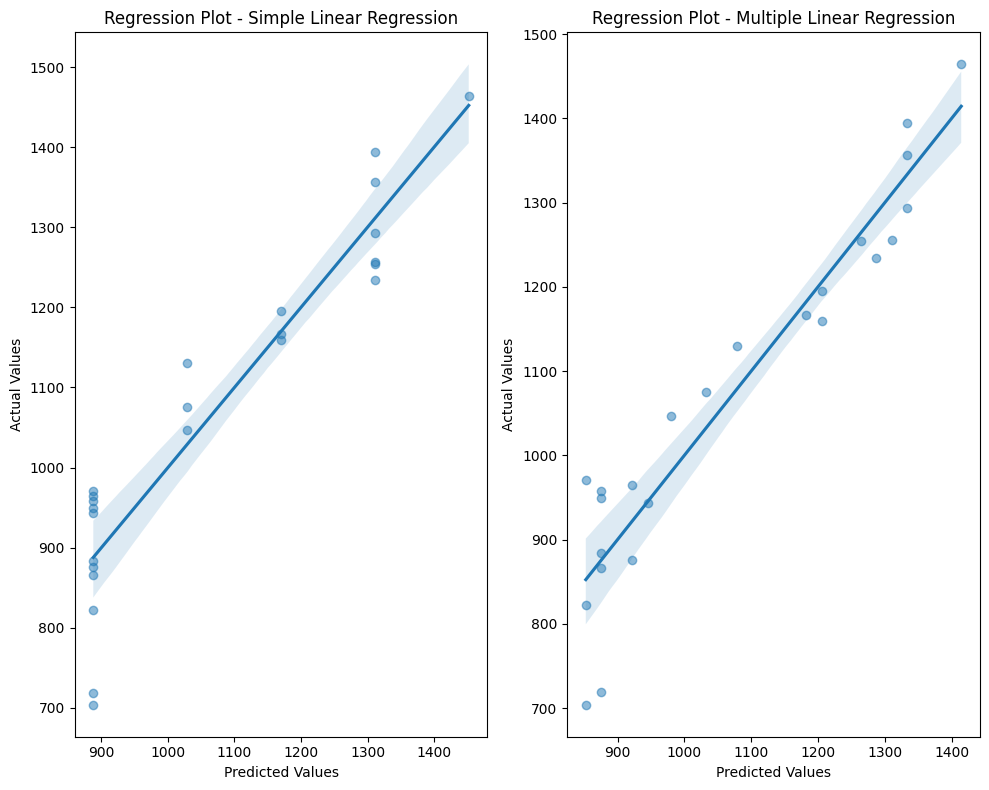

In [39]:
# Regression Plots
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.regplot(x=model_simple.predict(X_simple), y=y_simple, scatter_kws={'alpha':0.5})
plt.title('Regression Plot - Simple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.subplot(1, 2, 2)
sns.regplot(x=model_multiple.predict(X_multiple), y=y_multiple, scatter_kws={'alpha':0.5})
plt.title('Regression Plot - Multiple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.tight_layout()
plt.show()